<center>

# Python for Quantum Mechanics: 
# Week 5: Excercises

</center>

## Exercise 1: Settlers of Histogram

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Imagine a game that involves rolling two dice (six sided) and adding the results. Knowing the most likely outcomes is important for doing well in this game so you want to run a simulation of the dice rolls. Make a historgam of the results for 1000 rolls.

<img src="images/two_dice.png" alt="two dice" width="200"/>

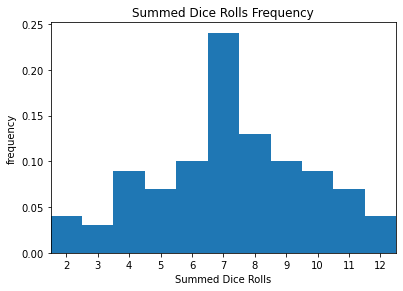

In [2]:
die_1 = np.random.randint(1,7,size=100)
die_2 = np.random.randint(1,7,size=100)
sum_of_dice = die_1 + die_2

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.hist(sum_of_dice,bins=np.linspace(1,12,12)+.5,density=True)
ax.set_xlim(1.5,12.5)
ax.set_xticks(np.arange(2,13,1))

ax.set_title('Summed Dice Rolls Frequency')
ax.set_xlabel('Summed Dice Rolls')
ax.set_ylabel('frequency')

plt.show()

## Exercise 2: Normal Distribution

In [2]:
import matplotlib.pyplot as plt
import numpy as np

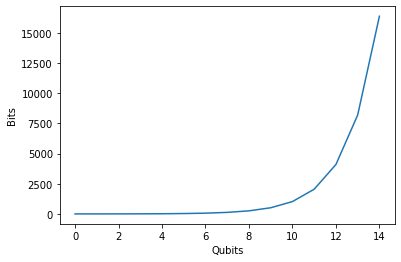

In [11]:
x = np.array([i for i in range(15)])
y = 2**x

plt.figure()
plt.xlabel("Qubits")
plt.ylabel("Bits")
plt.plot(x,y)
plt.show()

A gaussian curve with mean $\mu$ and standard deviation $\sigma$ is given by
$$g(x)=\frac{1}{\sigma\sqrt{2\pi}} \exp{\left( - \frac{1}{2} \frac{(x-\mu)^2}{\sigma^2} \right)}.$$

In [4]:
def gaus(x,sig=1,mu=0):
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-.5*((x-mu)/sig)**2)

Make a plot of a normal distribution histogram with a gaussian curve overlayed on it.

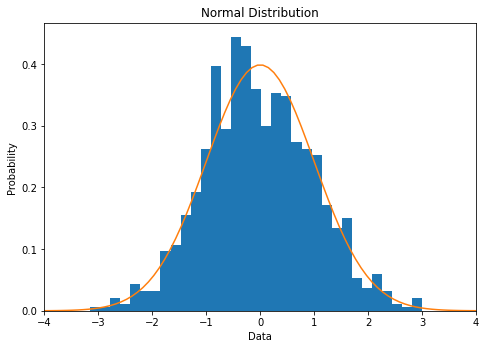

In [5]:
sig = 1
mu = 0
x = np.linspace(-5,5,100)

rand_data = np.random.normal(mu,sig,1000)

fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])

ax.hist(rand_data, density=True, bins=40)  

ax.plot(x,gaus(x,sig,mu))

ax.set_title('Normal Distribution')

ax.set_xlim([-4,4])
ax.set_ylim(0)
ax.set_ylabel('Probability')
ax.set_xlabel('Data')

plt.show()

Plot the following function using `plot_surface()`
$$G(x,y)=g\left( \sqrt{x^2+y^2} \right)$$

In [6]:
def gaus3d(x,y,sig=1,mu=0):
    return gaus(np.sqrt(x**2 + y**2))

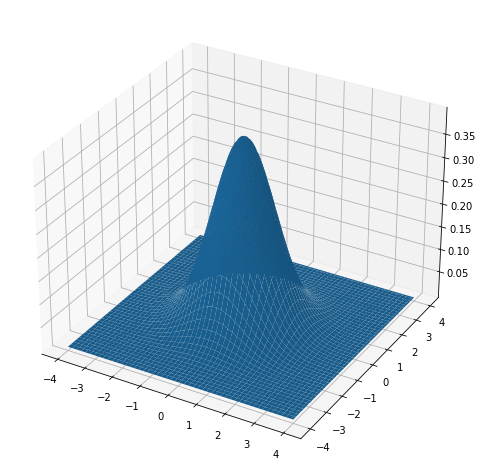

In [7]:
xs = np.linspace(-4,4,100)
ys = np.linspace(-4,4,100)

sig = 1
mu = 0

xmesh,ymesh = np.meshgrid(xs, ys)
zmesh = gaus3d(xmesh,ymesh)


fig = plt.figure(figsize = (8,8))
ax = fig.add_axes([.1,.1,.8,.8],projection='3d')
ax.plot_surface(xmesh, ymesh, zmesh)

plt.show()

## Exercise 3: Particle in a Box

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

Use the following functions to make an animation of the real and imaginary parts of a particle in a box for any $n$.
<img src="images/box_potential.png" alt="two dice" width="200"/>

In [9]:
def psi(n,x,l):
    return np.sqrt(2/l) * np.sin(n*np.pi*x/l)

def energy(n):
    return -13.6/n**2

def psi_im(n,x,t,l):
    return np.sin(-t*energy(n)) * psi(n,x,l)

def psi_re(n,x,t,l):
    return np.cos(-t*energy(n)) * psi(n,x,l)

<IPython.core.display.Javascript object>


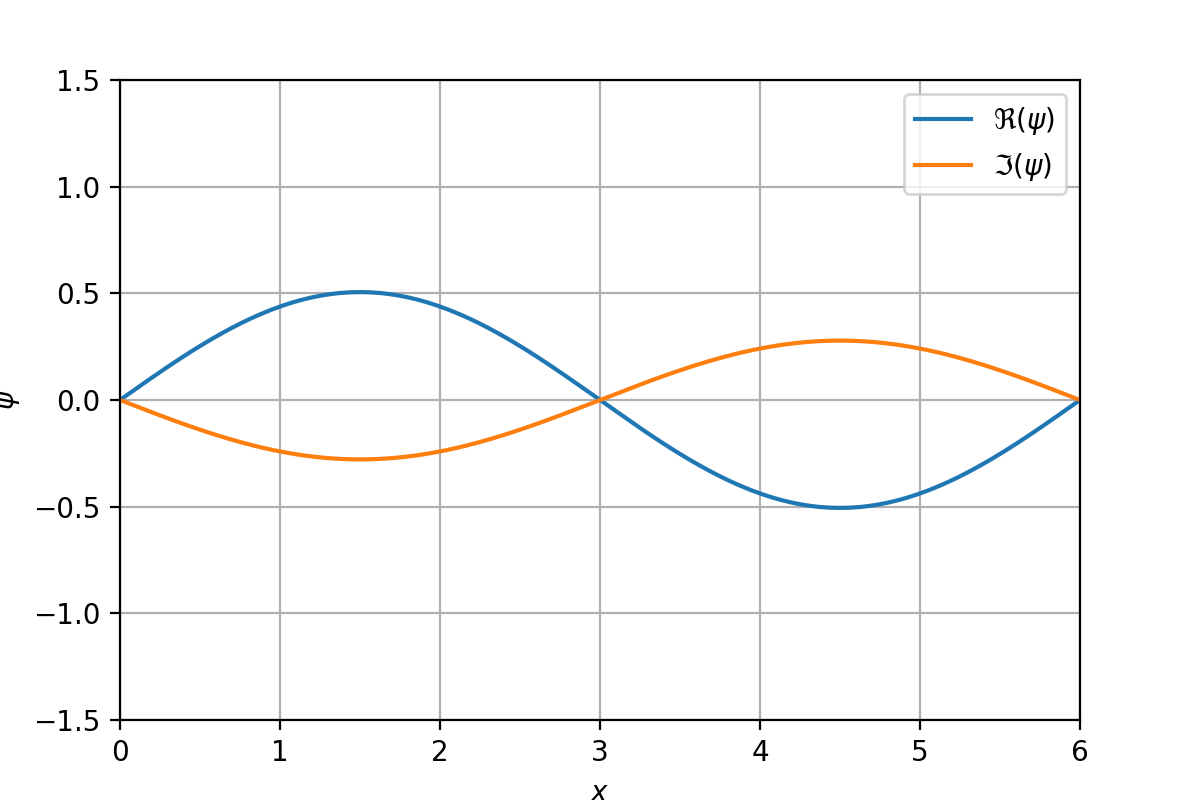

In [10]:
l=6
n=2
x=np.arange(0,l,.001)

fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([.1,.1,.8,.8])

line1, = ax.plot([], [], label='$\Re (\psi)$')
line2, = ax.plot([], [], label='$\Im (\psi)$')
lines = [line1,line2]

ax.set_xlim(0,l)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$\psi$')

ax.legend(loc='upper right')
ax.grid()

def init():
    for line in lines:
        line.set_data([],[])
    return lines

def animate(i):
    lines[0].set_data(x,psi_re(n,x,i/10,l))
    lines[1].set_data(x,psi_im(n,x,i/10,l))
    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)
plt.show()

Now put the real and imaginary parts on the $y$ and $z$ axes of a 3D plot.

<IPython.core.display.Javascript object>


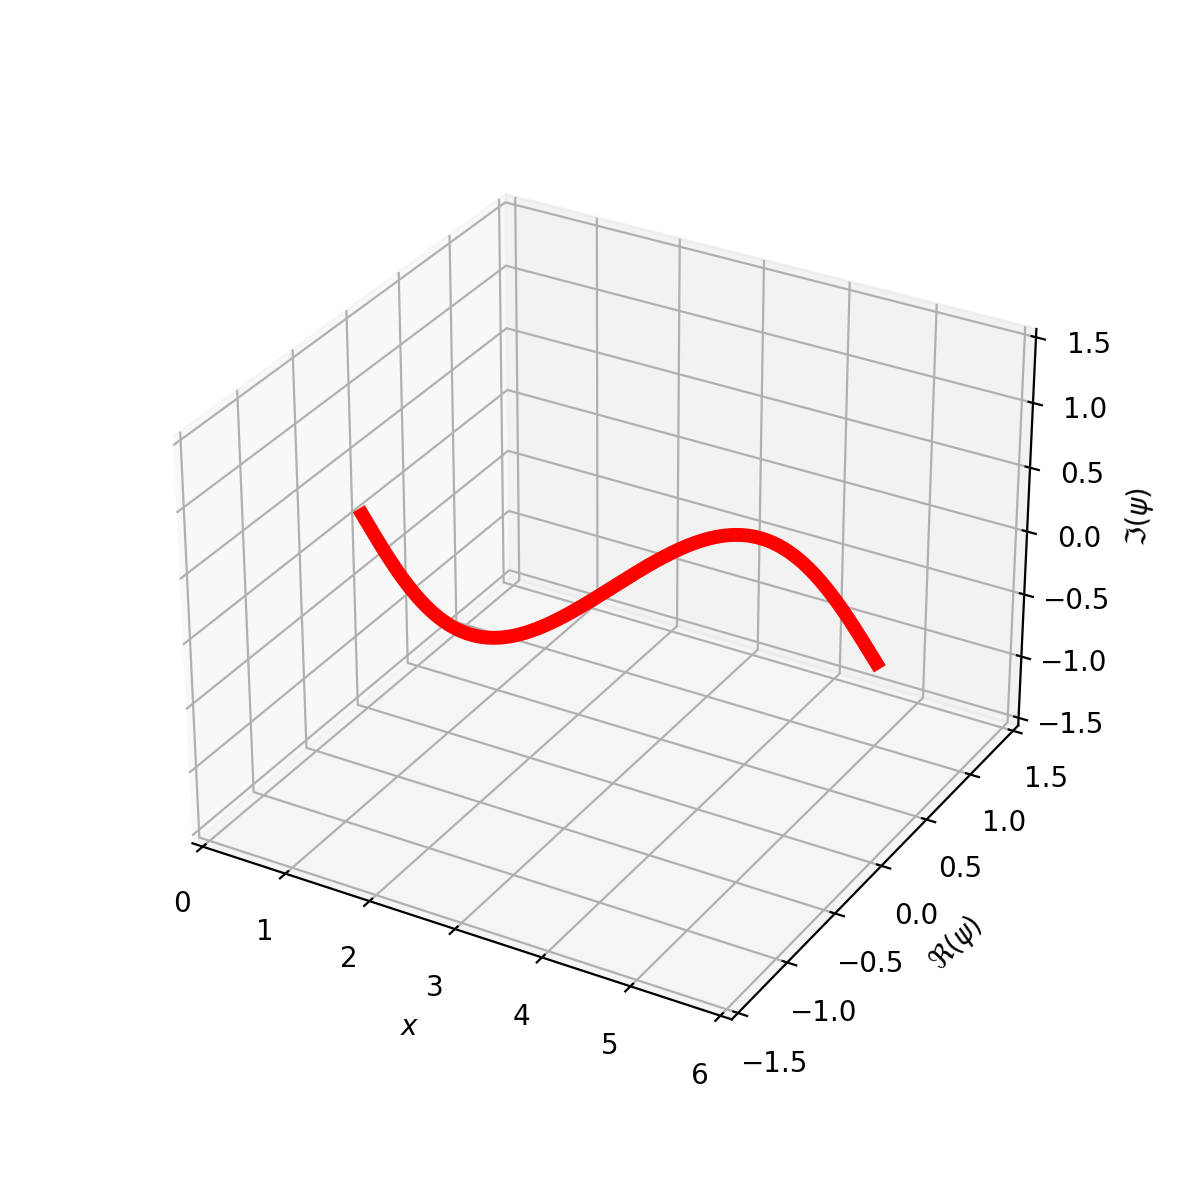

In [11]:
l=6
n=2
x=np.arange(0,l,.001)

fig = plt.figure(figsize = (6,6))
ax = fig.add_axes([.1,.1,.8,.8], projection='3d')

line, = ax.plot3D([],[],[], lw=5, color='red')

ax.set_xlim(0,l)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$\Re(\psi)$')
ax.set_zlabel('$\Im(\psi)$')

def init():
    line.set_data_3d([], [], [])
    return line,

def animate(i):
    line.set_data_3d(x, psi_re(n,x,i/10,l), psi_im(n,x,i/10,l))
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

plt.show()

## Exercise 4: Plotting a Sphere

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

You can parameterize a sphere of radius $r$ with parameters $u \in [0,2\pi]$ and $v \in [0,\pi]$ 

$x = r \cos(u)\sin(v)$

$y = r \cos(u)\sin(v)$

$z = r \cos(u)\sin(v)$

Plot a 3D sphere of radius $r=3$.

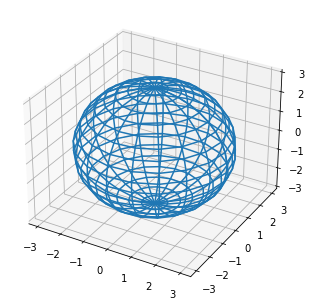

In [13]:
r = 3.0

us = np.linspace(0,2*np.pi,20)
vs = np.linspace(0,np.pi,20)

umesh,vmesh = np.meshgrid(us, vs)

x = r * np.cos(umesh) * np.sin(vmesh)
y = r * np.sin(umesh) * np.sin(vmesh)
z = r * np.cos(vmesh)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1],projection='3d')
ax.plot_wireframe(x,y,z)

plt.show()

## Exercise 5: Snake Animation

Reproduce the following animation of a line going around a spiral.
![SegmentLocal](images/my_animation.gif "snake")

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


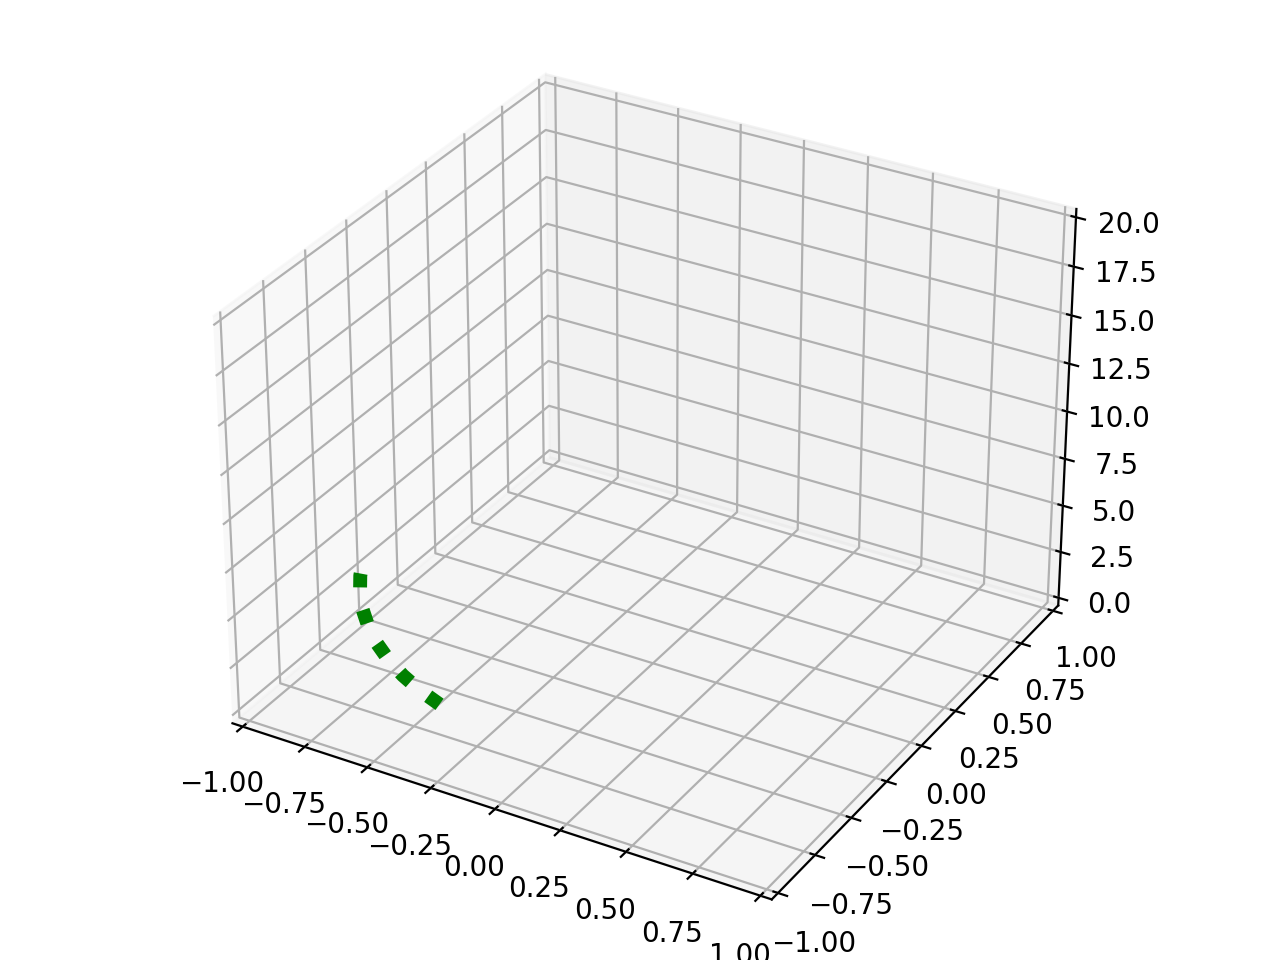

In [15]:
fig_snake = plt.figure()
ax_snake = fig_snake.add_axes([0,0,1,1], projection='3d')

z = np.arange(0, 20, .1)
x_snake, y_snake = np.sin(z), np.cos(z)

snake, = ax_snake.plot3D([],[],[],ls=':',lw=5,color='green')

ax_snake.set_xlim(-1,1)
ax_snake.set_ylim(-1,1)
ax_snake.set_zlim(0,20)


def init():
    snake.set_data_3d(x_snake[0:10], y_snake[0:10], z[0:10])
    return snake,

def animate(i):
    snake.set_data_3d(x_snake[0+i:10+i], y_snake[0+i:10+i], z[0+i:10+i])
    return snake,

anim = FuncAnimation(fig_snake, animate, init_func=init, frames=200, interval=10, blit=True)

plt.show()